<h1> Week 5 Homework

<h2>Question 8.1</h2>
Describe a situation or problem from your job, everyday life, current events, etc., for which a linear
regression model would be appropriate. List some (up to 5) predictors that you might use. 

<h2>Answer 8.1</h2>

Predicting COVID-19 (a pandemic or epidemic disease in general) fatality rate and count can help nations plan for outbreaks, estimate required vacaination doeses, etc.

Possible predictors include:
1. Vacaination percentage of total population and it's forecast.
2. Current life expectancy.
3. Population density.
4. Percentage of the population aged above 60 years old.
5. Percentage of the population with chronic diseases.

Note: Testing is required to make sure that a linear regression model is suitable (more complex models, e.g. neural networks could be required)

<p><p style="page-break-after:always;"></p></p>

<h2>Question 8.2</h2>
Using crime data from http://www.statsci.org/data/general/uscrime.txt (file uscrime.txt, description at http://www.statsci.org/data/general/uscrime.html ), use regression (a useful R function is lm or glm) to predict the observed crime rate in a city with the following data: 

M = 14.0

So = 0

Ed = 10.0

Po1 = 12.0

Po2 = 15.5

LF = 0.640

M.F = 94.0

Pop = 150

NW = 1.1

U1 = 0.120

U2 = 3.6

Wealth = 3200

Ineq = 20.1

Prob = 0.04

Time = 39.0 

Show your model (factors used and their coefficients), the software output, and the quality of fit.

Note that because there are only 47 data points and 15 predictors, you’ll probably notice some overfitting. We’ll see ways of dealing with this sort of problem later in the course. 

<p><p style="page-break-after:always;"></p></p>

<h2>Answer 8.2</h2>

In [1]:
# loading the dataset
# READ DATASET as DataFrame
df <- read.table("uscrime.txt", header = TRUE, sep = "\t")
# Display Data
head(df)
nrow(df)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
3,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
4,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
5,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
6,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


[1] 47

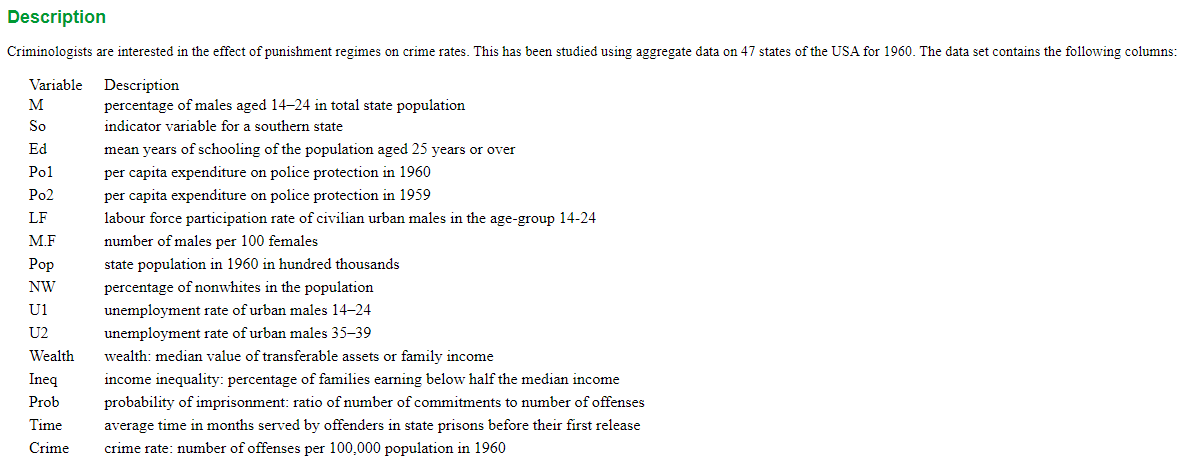

From the columns description above, some columns are expected to have high collinearity
1. Columns Po1 and Po2 are effecvtively the same variable in different years (per capita expenditure on police protection in 1959 & 1960). Both variables are very well correlated as shown in the graph below and as a result, only Po1 or Po2 should be included.
2. Columns U1 and U2 are effecvtively the same variable for high different age groups (unemployment rate of urban males aged 14-24 vs 35-39). Both variables are very well correlated as shown in the graph below and as a result, only U1 or U2 should be included.

As a result, Columns Po1 and U2 will be used.

<p><p style="page-break-after:always;"></p></p>

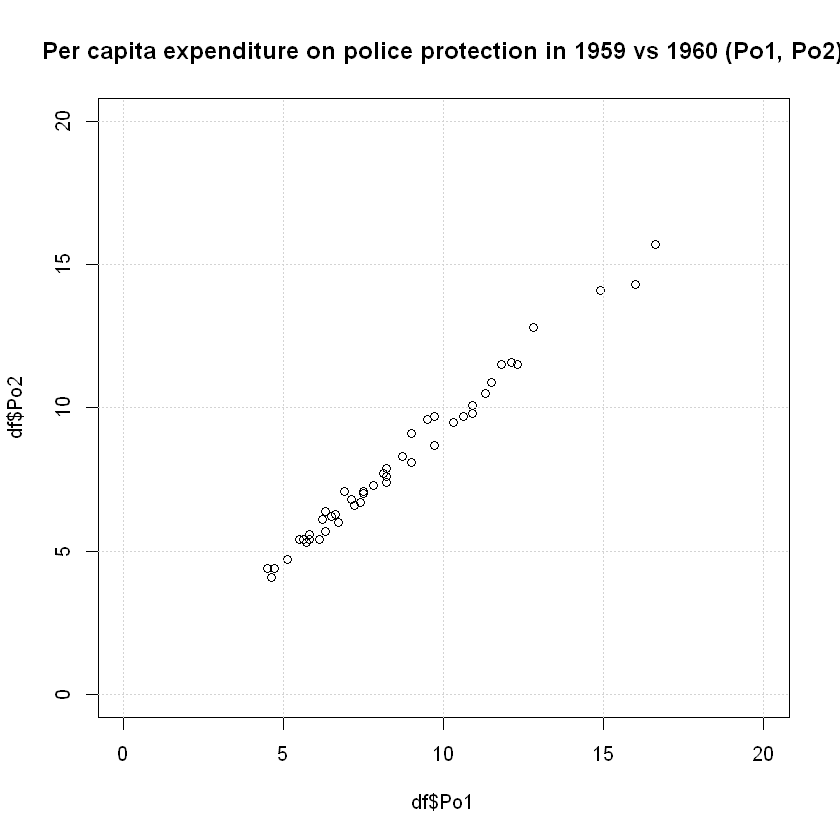

In [2]:
plot(df$Po1, df$Po2, xlim=c(0,20), ylim=c(0,20))
title("Per capita expenditure on police protection in 1959 vs 1960 (Po1, Po2)")
grid()

<p><p style="page-break-after:always;"></p></p>

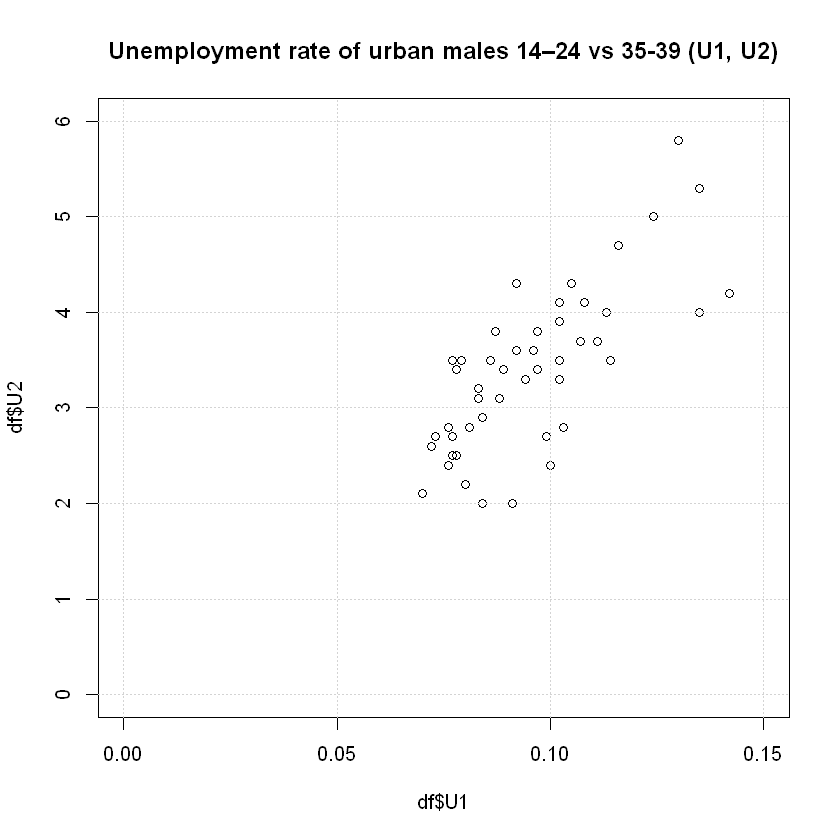

In [3]:
plot(df$U1, df$U2, xlim=c(0,0.15), ylim=c(0,6))
title("Unemployment rate of urban males 14–24 vs 35-39 (U1, U2)")
grid()

In [4]:
# Removing filtered columns
filtered_df <- df
filtered_df[,"Po2"] <- NULL
filtered_df[,"U1"] <- NULL

<p><p style="page-break-after:always;"></p></p>

In [5]:
# Create basic model
basic_model <- lm(Crime~., data=filtered_df)
summary(basic_model)
cat("Model AIC:", AIC(basic_model))
# store results
basic_model_adj.r2 <- summary(basic_model)$adj.r.squared
basic_model_r2 <- summary(basic_model)$r.squared
basic_model_AIC <- AIC(basic_model)
basic_model_Err <- summary(basic_model)$sigma


Call:
lm(formula = Crime ~ ., data = filtered_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-411.47  -86.36   -2.56  102.78  523.18 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5781.4546  1515.0540  -3.816 0.000565 ***
M              93.9001    41.8787   2.242 0.031788 *  
So             77.6600   138.6995   0.560 0.579318    
Ed            161.1992    60.1525   2.680 0.011402 *  
Po1           108.7879    22.1963   4.901 2.47e-05 ***
LF            495.5981  1287.4423   0.385 0.702746    
M.F             4.1693    17.3324   0.241 0.811391    
Pop            -1.0745     1.2790  -0.840 0.406903    
NW              1.0884     6.1601   0.177 0.860840    
U2             86.5139    52.1369   1.659 0.106519    
Wealth          0.1028     0.1039   0.990 0.329558    
Ineq           74.4182    22.7567   3.270 0.002518 ** 
Prob        -4262.3744  2206.1897  -1.932 0.061982 .  
Time           -0.2103     6.7226  -0.031 0.975236    
---
Signif. cod

Model AIC: 649.7316

In order to optimize the model, p-value (hypothesis testing) of each predictor will be used to determine the predictor importance. 

<b> Theory </b>
The p-value for each term tests the null hypothesis that the coefficient is equal to zero (i.e. predictor has no effect). A low p-value (typically < 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to the model.

From the analysis above:
1. 4 predictors with a p-value < 0.05 
2. 1 predictor with p-value between 0.05 and 0.1 (Prob)
3. 1 preidctor slightly above 0.1 p-value (U2)

As a result, 3 models will be created:
1. Model with only top 4 predictors
2. Model with top 5 predictors (including Prob)
3. Model with all 6 predictors (including Prob & U2)

<p><p style="page-break-after:always;"></p></p>

In [6]:
model_6factors <- lm( Crime ~ M + Ed + Po1 + U2 + Ineq + Prob, data = filtered_df)
summary(model_6factors)
cat("Model AIC:", AIC(model_6factors))
# store results
model_6factors_adj.r2 <- summary(model_6factors)$adj.r.squared
model_6factors_r2 <- summary(model_6factors)$r.squared
model_6factors_AIC <- AIC(model_6factors)
model_6factors_Err <- summary(model_6factors)$sigma


Call:
lm(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob, data = filtered_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-470.68  -78.41  -19.68  133.12  556.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5040.50     899.84  -5.602 1.72e-06 ***
M             105.02      33.30   3.154  0.00305 ** 
Ed            196.47      44.75   4.390 8.07e-05 ***
Po1           115.02      13.75   8.363 2.56e-10 ***
U2             89.37      40.91   2.185  0.03483 *  
Ineq           67.65      13.94   4.855 1.88e-05 ***
Prob        -3801.84    1528.10  -2.488  0.01711 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 200.7 on 40 degrees of freedom
Multiple R-squared:  0.7659,	Adjusted R-squared:  0.7307 
F-statistic: 21.81 on 6 and 40 DF,  p-value: 3.418e-11


Model AIC: 640.1661

<p><p style="page-break-after:always;"></p></p>

In [7]:
model_5factors <- lm( Crime ~ M + Ed + Po1 + Ineq + Prob, data = filtered_df)
summary(model_5factors)
cat("Model AIC:", AIC(model_5factors))
# store results
model_5factors_adj.r2 <- summary(model_5factors)$adj.r.squared
model_5factors_r2 <- summary(model_5factors)$r.squared
model_5factors_AIC <- AIC(model_5factors)
model_5factors_Err <- summary(model_5factors)$sigma


Call:
lm(formula = Crime ~ M + Ed + Po1 + Ineq + Prob, data = filtered_df)

Residuals:
   Min     1Q Median     3Q    Max 
-528.2  -74.0   -7.0  139.8  503.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4064.57     816.28  -4.979 1.20e-05 ***
M              79.69      32.62   2.443 0.018964 *  
Ed            160.15      43.42   3.688 0.000656 ***
Po1           121.23      14.06   8.621 9.47e-11 ***
Ineq           68.31      14.56   4.692 3.00e-05 ***
Prob        -3867.27    1596.55  -2.422 0.019930 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 209.7 on 41 degrees of freedom
Multiple R-squared:  0.7379,	Adjusted R-squared:  0.706 
F-statistic: 23.09 on 5 and 41 DF,  p-value: 5.926e-11


Model AIC: 643.4641

<p><p style="page-break-after:always;"></p></p>

In [8]:
model_4factors <- lm( Crime ~ M + Ed + Po1 + Ineq, data = filtered_df)
summary(model_4factors)
cat("Model AIC:", AIC(model_4factors))
# store results
model_4factors_adj.r2 <- summary(model_4factors)$adj.r.squared
model_4factors_r2 <- summary(model_4factors)$r.squared
model_4factors_AIC <- AIC(model_4factors)
model_4factors_Err <- summary(model_4factors)$sigma


Call:
lm(formula = Crime ~ M + Ed + Po1 + Ineq, data = filtered_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-530.93  -91.88    7.56  137.72  576.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4249.22     858.51  -4.950 1.25e-05 ***
M              76.02      34.42   2.209 0.032714 *  
Ed            166.05      45.80   3.626 0.000773 ***
Po1           129.80      14.38   9.029 2.16e-11 ***
Ineq           64.09      15.27   4.197 0.000137 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 221.5 on 42 degrees of freedom
Multiple R-squared:  0.7004,	Adjusted R-squared:  0.6719 
F-statistic: 24.55 on 4 and 42 DF,  p-value: 1.595e-10


Model AIC: 647.7503

<p><p style="page-break-after:always;"></p></p>

In [9]:
# preparing summary of all models
models <- c("Basic_Model", "Model_6Factors", "Model_5Factors", "Model_4Factors")
models_adj.r2 <- c(basic_model_adj.r2, model_6factors_adj.r2, model_5factors_adj.r2, model_4factors_adj.r2)
models_r2 <- c(basic_model_r2, model_6factors_r2, model_5factors_r2, model_4factors_r2)
models_AIC <- c(basic_model_AIC, model_6factors_AIC, model_5factors_AIC, model_4factors_AIC)
models_Err <- c(basic_model_Err, model_6factors_Err, model_5factors_Err, model_4factors_Err)
results <- data.frame("Models"=models, "R2"=models_r2, "Adjusted R2"=models_adj.r2, 
                      "AIC"=models_AIC, "Residual error"=models_Err)
results

Models,R2,Adjusted.R2,AIC,Residual.error
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Basic_Model,0.7869472,0.7030173,649.7316,210.7707
Model_6Factors,0.7658663,0.7307463,640.1661,200.6899
Model_5Factors,0.7379292,0.7059693,643.4641,209.7205
Model_4Factors,0.7004252,0.6718942,647.7503,221.5397


From the summary table above, the 6 predictors model has the highest Adjusted R2 with the smallest AIC and Residual error. As a result, the 6 predictors model is most likely to be the optimum model. Note that the Basic model has the highest R2 however, it has lower Adjusted R2 due to more predictors being included.

In addition to the adjusted R2 showing highest value for the 6 predictors model, in order to asses the gained benefit from the more complex model (6 predictors) as compared to the less complex model (5 predictors) Anova Test will be used.

<b> Anova Test Theory </b>
1. Null-Hypothesis: The more complex model is significantly better at capturing the data than the simpler model. (p-value < 0.05)
2. Alternative-Hypothesis: the simpler model is better (p-value > 0.05)

Reference: https://bookdown.org/ndphillips/YaRrr/comparing-regression-models-with-anova.html

<p><p style="page-break-after:always;"></p></p>

In [10]:
"Testing the basic model with all the predictors aganist the 6 predictors model"
anova(model_6factors, basic_model)

[1] "Testing the basic model with all the predictors aganist the 6 predictors model"

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,40,1611057,NA,NA,NA,NA
2,33,1466001,7,145056,0.4664633,0.8515991


In [11]:
"Testing the 6 predictors model aganist the 5 predictors model"
anova(model_5factors, model_6factors)

[1] "Testing the 6 predictors model aganist the 5 predictors model"

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,41,1803290,NA,NA,NA,NA
2,40,1611057,1,192233.4,4.772853,0.0348313


In [12]:
"Testing the 6 predictors model aganist the 4 predictors model"
anova(model_4factors, model_6factors)

[1] "Testing the 6 predictors model aganist the 4 predictors model"

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,42,2061353,NA,NA,NA,NA
2,40,1611057,2,450295.9,5.590069,0.007230541


From the Anova testing,
1. The 6 predictors model - with 7 less predictors - is better than the more complex basic model (p-value = 0.85)
2. The 6 predictors model (more complex) is better than the both the 5 predictors model and the 4 predictors model (p-value = 0.035 & 0.007 respectively)

As a result, the 6 predictors model is the optimum model aligned with the adjusted R2 results.

<p><p style="page-break-after:always;"></p></p>

"New City Prediciton"

In [13]:
# creating required test city data
test_city <- data.frame("M"=14.0, "So"=0, "Ed"=10.0, "Po1"=12.0, "Po2"=15.5, "LF"=0.64, "M.F"=94.0, "Pop"=150, "NW"=1.1,
                       "U1"=0.12, "U2"=3.6, "Wealth"=3200, "Ineq"=20.1, "Prob"=0.04, "Time"=39.0)
test_city

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,0,10,12,15.5,0.64,94,150,1.1,0.12,3.6,3200,20.1,0.04,39


In [14]:
# Predict New City Crime
test_city_pred <- round(predict(model_6factors, test_city, type = "response", interval="prediction", level=0.95), 0)
cat("Predicted Crime rate for the new city is", test_city_pred[,"fit"], "\n")
# calculate confidence
cat("Predicted Crime rate the new city is between", test_city_pred[,"lwr"] , "&", test_city_pred[,"upr"], "with 95% confidence")

Predicted Crime rate for the new city is 1304 
Predicted Crime rate the new city is between 880 & 1728 with 95% confidence

In [15]:
# range of Crime rates in dataset
cat("Range of Crime rates in dataset", range(df$Crime))

Range of Crime rates in dataset 342 1993

<p><p style="page-break-after:always;"></p></p>

<b> In conclusion, </b>
    
The predicted crime rate for the required city is 1,304 Crimes/100,000 population. 

The predicted Crime rate the new city is between 880 & 1728 with 95% confidence which falls reasonably between the limits of the crimes column minimum and maximum which are 342 and 1993 respectively.

The final model utilizes 6 predictors. The predictors used and their coffcients are:

In [16]:
round(summary(model_6factors)$coefficients[,"Estimate"],0)

(Intercept)           M          Ed         Po1          U2        Ineq 
      -5041         105         196         115          89          68 
       Prob 
      -3802

The quality of the model fit is assesed below:

In [17]:
cat("Residual standard error:", round(summary(model_6factors)$sigma,0), "\n")
cat("R-squared:", round(summary(model_6factors)$r.squared,3), "\n")
cat("Adjusted R-squared:", round(summary(model_6factors)$adj.r.squared,3), "\n")

Residual standard error: 201 
R-squared: 0.766 
Adjusted R-squared: 0.731 


Software output

In [18]:
summary(model_6factors)


Call:
lm(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob, data = filtered_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-470.68  -78.41  -19.68  133.12  556.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5040.50     899.84  -5.602 1.72e-06 ***
M             105.02      33.30   3.154  0.00305 ** 
Ed            196.47      44.75   4.390 8.07e-05 ***
Po1           115.02      13.75   8.363 2.56e-10 ***
U2             89.37      40.91   2.185  0.03483 *  
Ineq           67.65      13.94   4.855 1.88e-05 ***
Prob        -3801.84    1528.10  -2.488  0.01711 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 200.7 on 40 degrees of freedom
Multiple R-squared:  0.7659,	Adjusted R-squared:  0.7307 
F-statistic: 21.81 on 6 and 40 DF,  p-value: 3.418e-11
